In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
def displayImage(img):
  """
  Function to display image.
  Input: Image
  Output: Plot of Image.
  """
  plt.imshow(img,cmap='gray')
  plt.xticks([])
  plt.yticks([])

In [ ]:
def Normalize(img):
  """
  Function to perform Min-Max feature scaling.
  """
  return (img - np.min(img))/(np.max(img) - np.min(img))

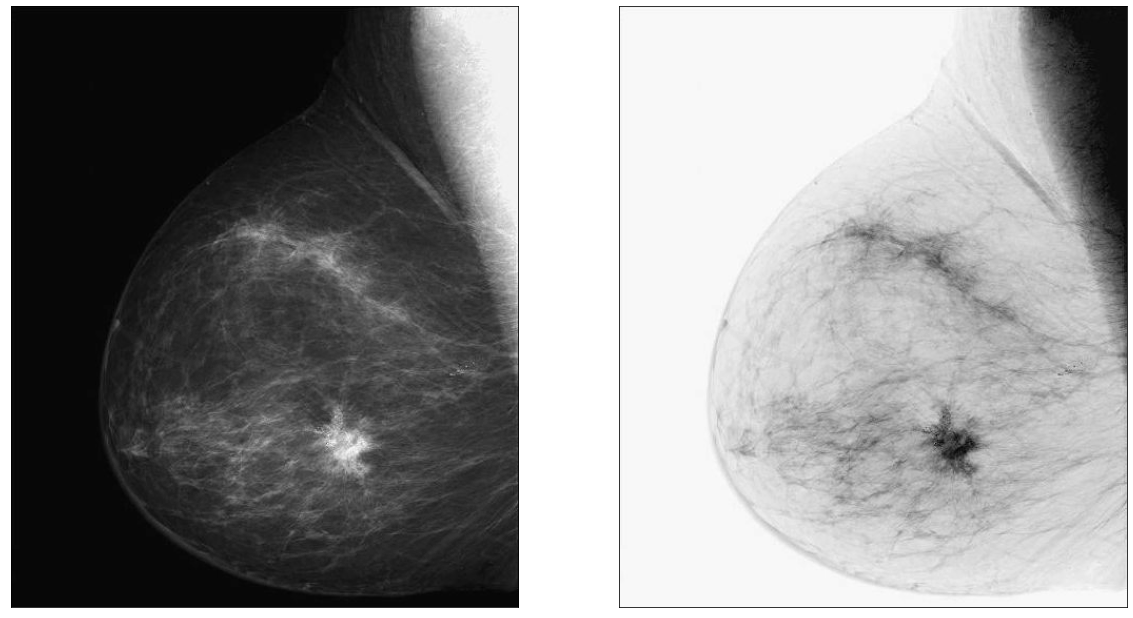

In [ ]:
# Negative of Image.
def ImageNegative(img):
  """
  Function to create negative of an image.
  Input: Image
  Output: Negative Image.
  """
  img = Normalize(img)
  maxImg = np.max(img)
  negImg = maxImg - img
  return negImg

img = cv.imread('cancer.tif',0)
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
displayImage(img)

ImgNeg = ImageNegative(img)
plt.subplot(1, 2, 2)
displayImage(ImgNeg)

plt.show()

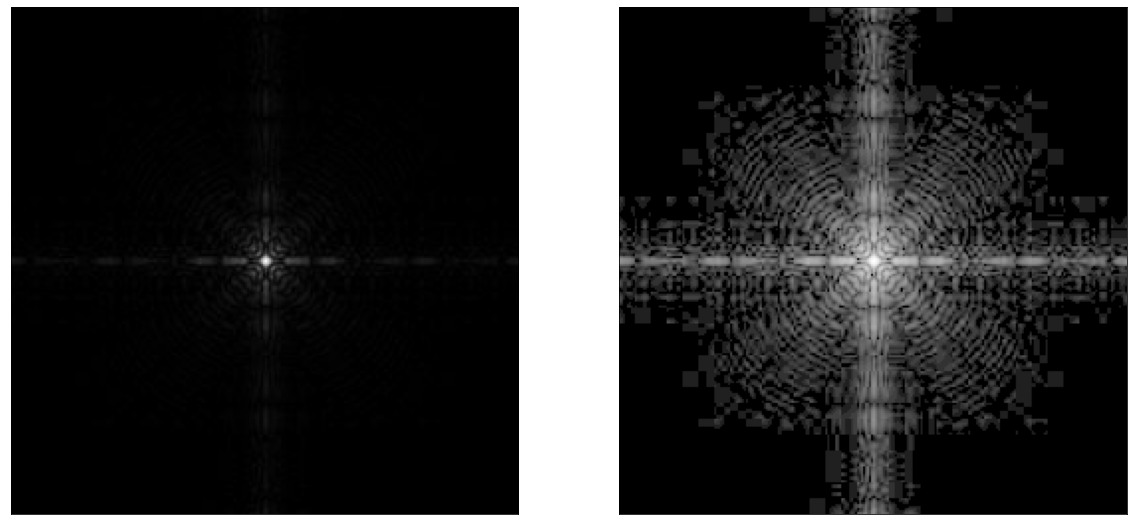

In [ ]:
# Log of Image.
def logImage(img, c=1):
  """
  Function to Perform Log Transformation on an image.
  Input: Image
  Output: Image transformed using log function.
  """
  return c*np.log1p(img)

img = cv.imread('DFT.tif',0)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
displayImage(img)

logImg = logImage(img, 2)
logImg = logImg.astype('float')

plt.subplot(1, 2, 2)
displayImage(logImg)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


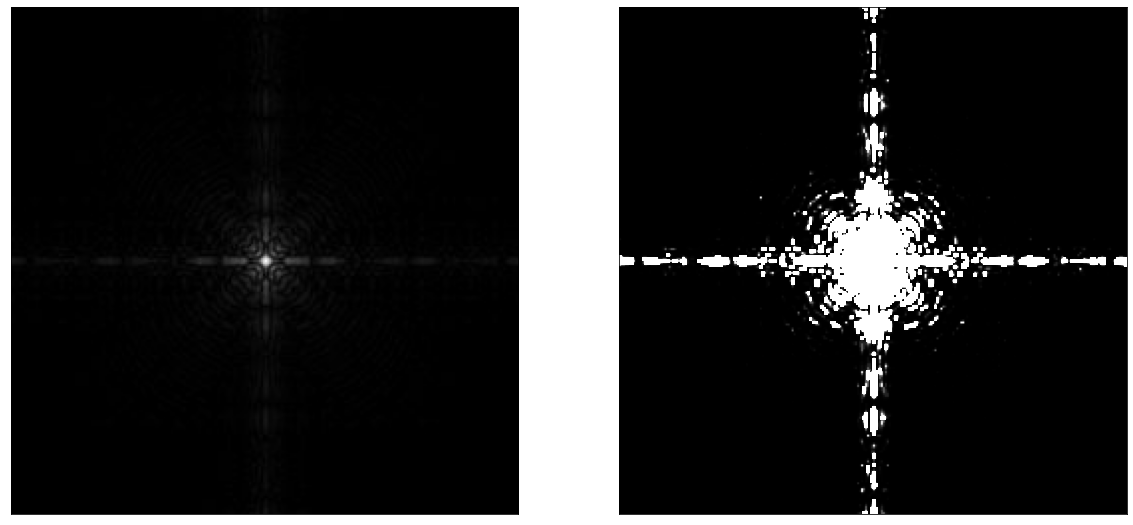

In [ ]:
# Inverse Log of Image.
def InvlogImage(img, c=1):
  """
  Function to Perform Inverse Log Transformation on an image.
  Input: Image
  Output: Image transformed using Inverse log function(exponential).
  """
  return c*np.exp(img)

img = cv.imread('DFT.tif',0)
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
displayImage(img)

InvlogImg = InvlogImage(img, 2)
InvlogImg = InvlogImg.astype('float')
#print(InvlogImg)

plt.subplot(1, 2, 2)
displayImage(InvlogImg)

plt.show()

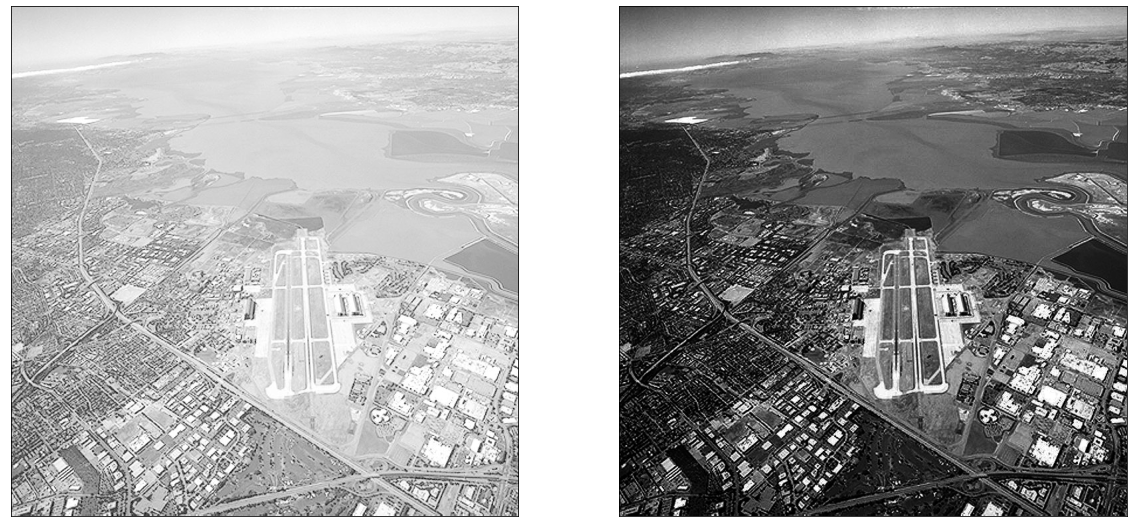

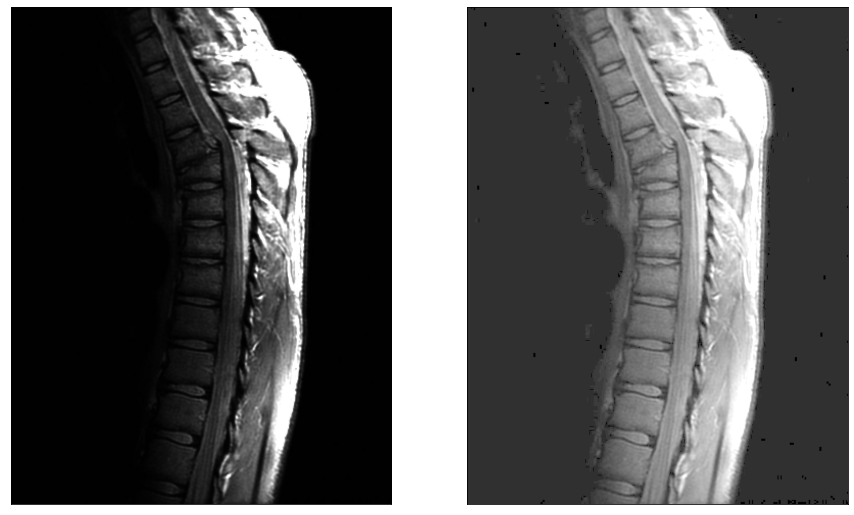

In [ ]:
# Power Law .
def PowerLaw(img, c = 1, gamma = 1):
  """
  Function to Perform Power Law Transformation on an image.
  Input: Image
  Output: Image transformed using Power Law(r^gamma).
  """
  img = Normalize(img)
  return c*(img**gamma)

# Image 1.
img = cv.imread('0309.tif',0)
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
displayImage(img)

PowImg = PowerLaw(img, 1, 5)
plt.subplot(1, 2, 2)
displayImage(PowImg)

plt.show()

# Image 2.
img = cv.imread('spine.tif',0)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
displayImage(img)

PowImg = PowerLaw(img, 1, 0.3)
plt.subplot(1, 2, 2)
displayImage(PowImg)

plt.show()

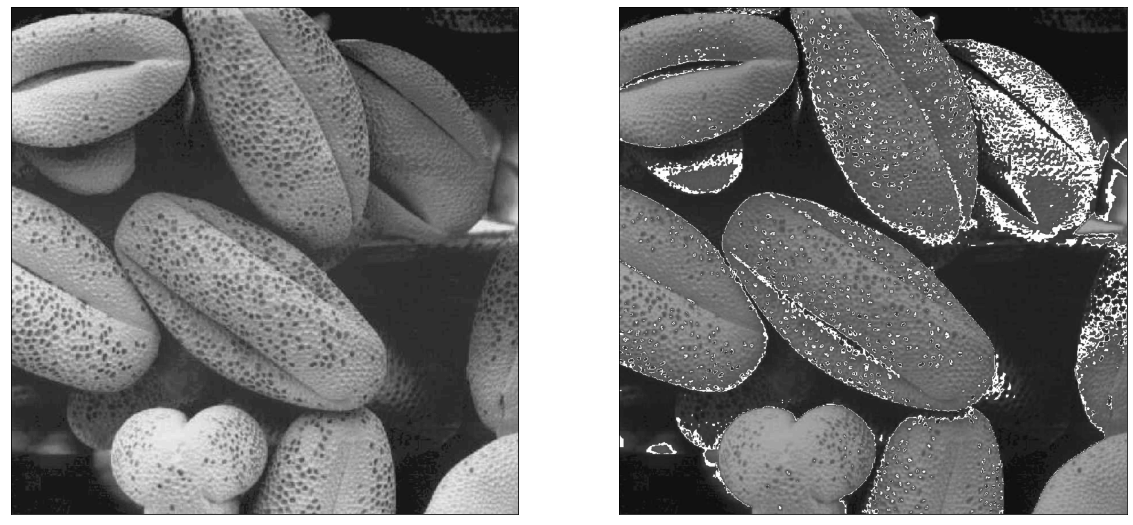

In [ ]:
# Piece-wise Linear Transform .
def PWLTimg(img, a, b):
  """
  Function to Perform Piecewise linear Transformation on an image.
  Input: Image
  Output: Transformed Image.
  """
  sze = np.shape(img)
  img = Normalize(img)
  if a >= np.min(img) and b <= np.max(img):
    for i in range(sze[0]):
      for j in range(sze[1]):
        if img[i,j] >= a and img[i,j] <= b:
          img[i,j] += 1
  else:
    print('Intensities out of range.')
  
  return img

img = cv.imread('pollen.tif',0)
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
displayImage(img)

PWLTImg = PWLTimg(img, 0.35, 0.4)
plt.subplot(1, 2, 2)
displayImage(PWLTImg)

In [ ]:
# Piece-wise Linear Transform .
def PWLTimg(img, a, b):
  img = Normalize(img)
  if a >= np.min(img) and b <= np.max(img):
    img[img.any() >= a & img.any() <= b] = img + 1
  return img

img = cv.imread('pollen.tif',0)
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
displayImage(img)

PWLTImg = PWLTimg(img, 0.3, 0.6)
plt.subplot(1, 2, 2)
displayImage(PWLTImg)